## Discretization with k-means clustering

This discretization method consists of applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

- 1) Initialization: random creation of K centers
- 2) Each data point is associated with the closest center
- 3) Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimizes the pairwise squared deviations of points within the same cluster.

More details about k-means are here](https://en.wikipedia.org/wiki/K-means_clustering)

Nice blog with graphical explanation of k-means [here](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) 

Note that the user needs to define the number of clusters.

## Titanic dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
from sklearn import set_config
set_config(transform_output = 'pandas')

In [3]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('../../Data/titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that I will fill by extracting a random sample of the variable.

In [5]:
def impute_na(data, variable):
    # function to fill NA with a random sample

    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [6]:
# replace NA in both train and test sets

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

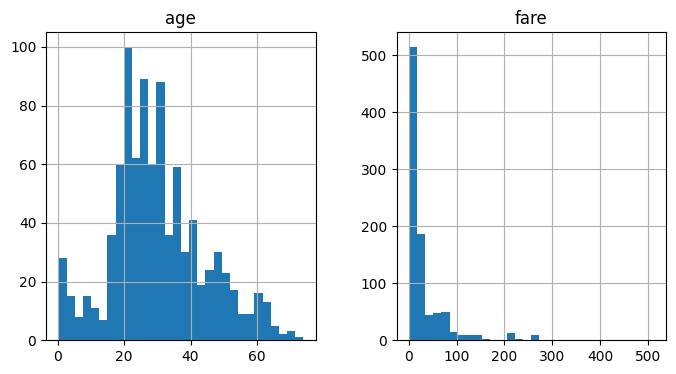

In [7]:
# let's explore the distribution of age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Discretisation with k-means

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
disc.fit(X_train[['age', 'fare']])

c:\Users\avvoy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [8]:
disc.bin_edges_

array([array([ 0.1667    , 19.35059866, 34.06303553, 50.22640292, 74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
              512.3292    ])                                         ],
      dtype=object)

In [9]:
train_t = disc.transform(X_train[['age', 'fare']])
test_t = disc.transform(X_test[['age', 'fare']])

train_t.head()

,age,fare
501,0.0,0.0
588,0.0,0.0
402,1.0,0.0
1193,2.0,0.0
686,1.0,0.0


Text(0, 0.5, 'Number of observations per bin')

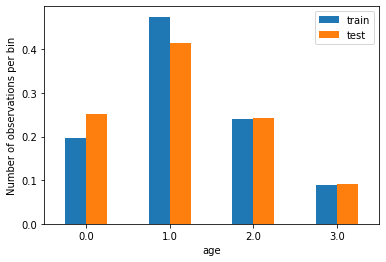

In [10]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

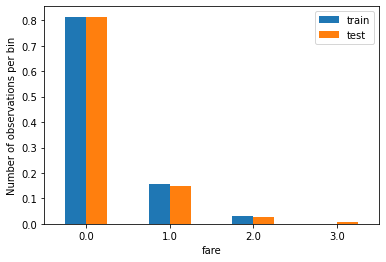

In [11]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')